In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.config import BATCH_SIZE
import random 
import numpy as np 
import torch 
from src.data_loader import read_data
from src.networks.unimodal_BERT import unimodal_dBERT_Dataset

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
g = torch.Generator()
g.manual_seed(0)

def get_dataloader(data_type):
    data = read_data(data_type)
    dataset = unimodal_dBERT_Dataset(data)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,shuffle=True, worker_init_fn=seed_worker, generator=g)
    return data_loader

In [3]:
train_loader = get_dataloader('train')
val_loader = get_dataloader('val')
test_loader = get_dataloader('test')

100%|██████████| 200/200 [00:00<00:00, 2291.59it/s]


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2/2 [00:00<00:00,  2.10it/s]




For epoch = 0
Training Loss = 0.6966753737492994 | Training Accuracy = 0.06837121212121212
Validation Loss = 0.6869978308677673|Validation Accuracy = 0.03125




100%|██████████| 2/2 [00:00<00:00,  2.14it/s]




For epoch = 1
Training Loss = 0.6935445991429415 | Training Accuracy = 0.11117424242424243
Validation Loss = 0.6866310834884644|Validation Accuracy = 0.047379032258064516




100%|██████████| 2/2 [00:00<00:00,  2.12it/s]




For epoch = 2
Training Loss = 0.6932663727890361 | Training Accuracy = 0.06571969696969697
Validation Loss = 0.6918807625770569|Validation Accuracy = 0.06350806451612903




100%|██████████| 2/2 [00:00<00:00,  2.10it/s]




For epoch = 3
Training Loss = 0.6945518119768663 | Training Accuracy = 0.0571969696969697
Validation Loss = 0.6915222108364105|Validation Accuracy = 0.06300403225806452




100%|██████████| 2/2 [00:00<00:00,  2.10it/s]




For epoch = 4
Training Loss = 0.6947824331847104 | Training Accuracy = 0.05596590909090909
Validation Loss = 0.6922484636306763|Validation Accuracy = 0.04788306451612903




100%|██████████| 2/2 [00:00<00:00,  2.10it/s]




For epoch = 5
Training Loss = 0.6994000239805742 | Training Accuracy = 0.0387310606060606
Validation Loss = 0.6940435767173767|Validation Accuracy = 0.06300403225806452




100%|██████████| 2/2 [00:00<00:00,  2.04it/s]




For epoch = 6
Training Loss = 0.6975862112912264 | Training Accuracy = 0.05558712121212121
Validation Loss = 0.6929863095283508|Validation Accuracy = 0.047379032258064516




100%|██████████| 2/2 [00:00<00:00,  2.03it/s]




For epoch = 7
Training Loss = 0.7007992999120192 | Training Accuracy = 0.041193181818181816
Validation Loss = 0.6931471824645996|Validation Accuracy = 0.04788306451612903




100%|██████████| 2/2 [00:00<00:00,  2.00it/s]




For epoch = 8
Training Loss = 0.7016849653287367 | Training Accuracy = 0.041193181818181816
Validation Loss = 0.6931471824645996|Validation Accuracy = 0.047379032258064516




100%|██████████| 2/2 [00:00<00:00,  2.00it/s]




For epoch = 9
Training Loss = 0.7023870186372236 | Training Accuracy = 0.041193181818181816
Validation Loss = 0.6931471824645996|Validation Accuracy = 0.04788306451612903




100%|██████████| 2/2 [00:00<00:00,  2.01it/s]




For epoch = 10
Training Loss = 0.7030539187518033 | Training Accuracy = 0.041193181818181816
Validation Loss = 0.6931471824645996|Validation Accuracy = 0.046875




100%|██████████| 2/2 [00:01<00:00,  1.96it/s]




For epoch = 11
Training Loss = 0.7037100493907928 | Training Accuracy = 0.0428030303030303
Validation Loss = 0.6931471824645996|Validation Accuracy = 0.04788306451612903




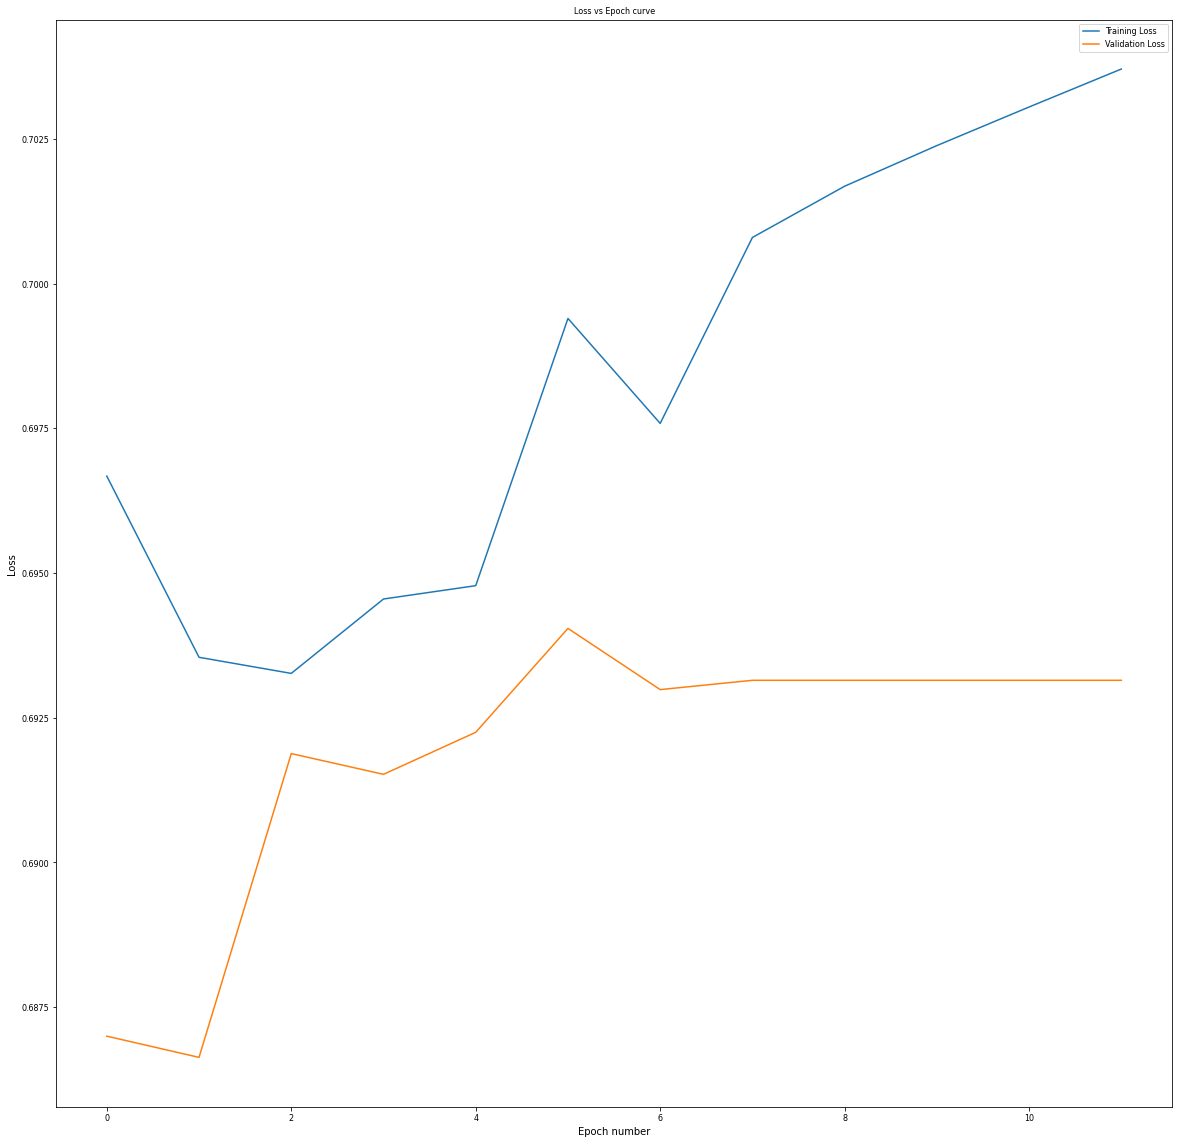

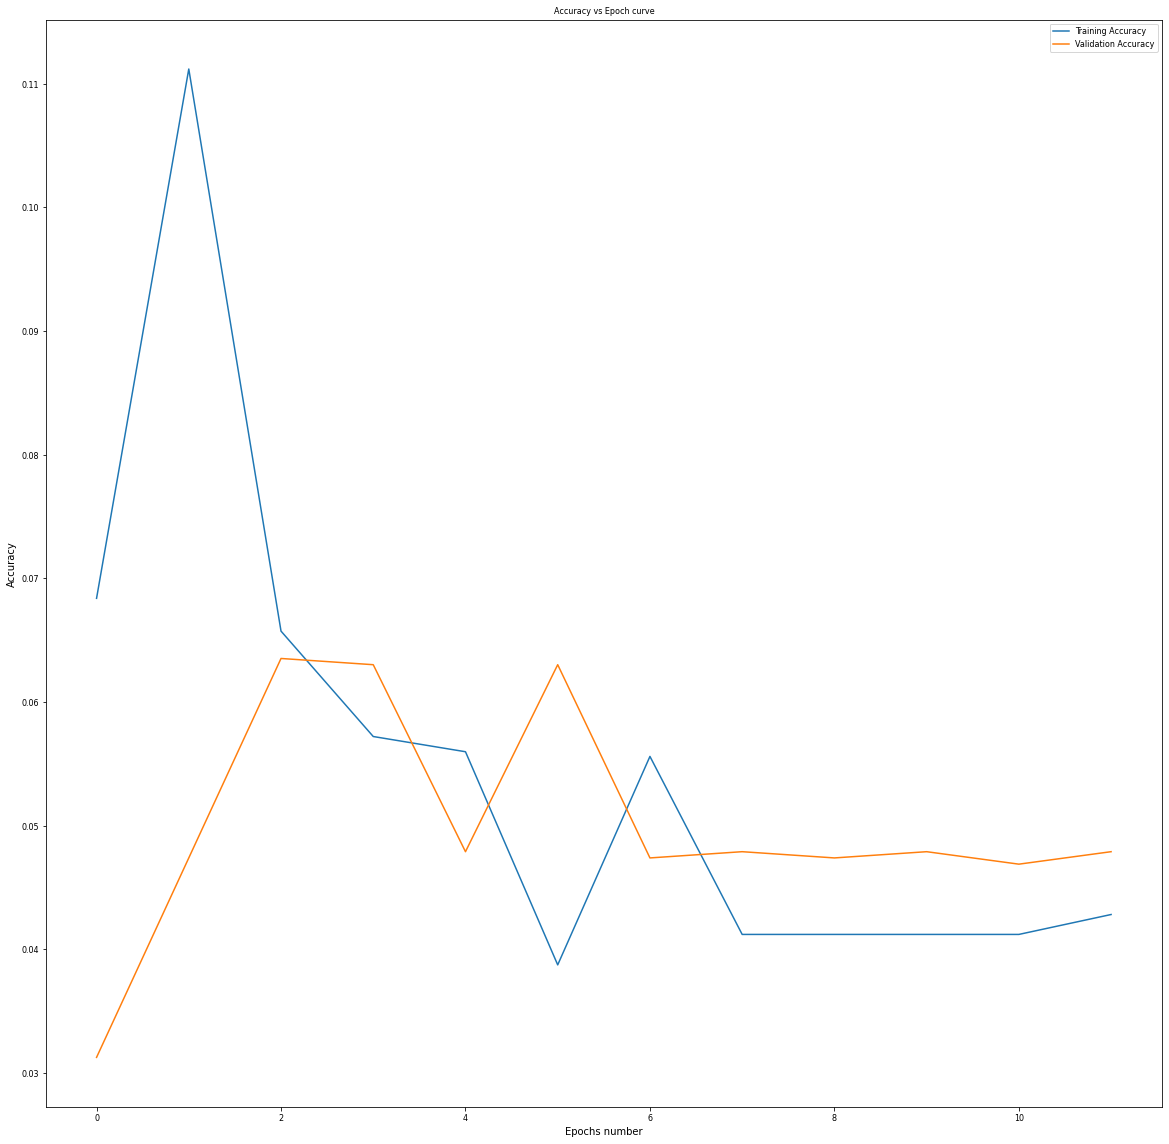

In [4]:
from src.trainer import Trainer
from src.networks.unimodal_BERT import unimodal_dBERT_Model, unimodal_dBERT_Input_transformer
import torch.nn as nn
import torch 

trainer = Trainer(12)

#Set data
trainer.set_data(train_loader, val_loader)

#set model 
model = unimodal_dBERT_Model().cuda()
input_transformer = unimodal_dBERT_Input_transformer()
trainer.set_model(model, input_transformer)

#Backpropagation
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
trainer.set_optimizer(optimizer, loss_fn)
trainer.train(l2_r=1e-3)
trainer.plot()

In [5]:
trainer.test(test_loader)

100%|██████████| 22/22 [00:11<00:00,  1.98it/s]

Accuracy Score = 4.2212518195050945
Macro F1 score Score = 0.0
Micro F1 score Score = 0.0


In [6]:
torch.save(model.state_dict(), f"Models/unimodal_dBERT_Model.model")